<a href="https://colab.research.google.com/github/MGUYZ001/GROUP-7/blob/main/tmdb_movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [9]:
tmdb_df = pd.read_csv('tmdb.movies.csv')
#viewing how the data looks
tmdb_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [10]:
#checking the nature of the data
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [11]:
# checking for missing values
tmdb_df.isnull().sum()

,0
Unnamed: 0,0
genre_ids,0
id,0
original_language,0
original_title,0
popularity,0
release_date,0
title,0
vote_average,0
vote_count,0


In [12]:
#checking for duplicated values
tmdb_df.duplicated().sum()

0

In [13]:
# Checking the top 10 most popular moives
most_popular = tmdb_df.nlargest(10, 'popularity')
print(most_popular[['title','popularity']])

                                             title  popularity
23811                       Avengers: Infinity War      80.773
11019                                    John Wick      78.123
23812            Spider-Man: Into the Spider-Verse      60.534
11020    The Hobbit: The Battle of the Five Armies      53.783
5179                                  The Avengers      50.289
11021                      Guardians of the Galaxy      49.606
20617                            Blade Runner 2049      48.571
23813                            Blade Runner 2049      48.571
23814  Fantastic Beasts: The Crimes of Grindelwald      48.508
23815                    Ralph Breaks the Internet      48.057


In [14]:
#checking whether the Blade Runner movie 2049 has the same information that is in popularity,vote count and average
blade_runner_info = tmdb_df[tmdb_df['title'] == 'Blade Runner 2049']
print(blade_runner_info)

       Unnamed: 0      genre_ids      id original_language     original_title  \
20617       20617  [878, 28, 53]  335984                en  Blade Runner 2049   
23813       23813  [878, 28, 53]  335984                en  Blade Runner 2049   

       popularity release_date              title  vote_average  vote_count  
20617      48.571   2017-10-06  Blade Runner 2049           7.4        6679  
23813      48.571   2017-10-06  Blade Runner 2049           7.4        6679  


In [47]:
Avatar_info = tmdb_df[tmdb_df['title'] == 'Avatar']
print(Avatar_info)

           genre_ids     id original_language  popularity release_date  \
6  [28, 12, 14, 878]  19995                en      26.526   2009-12-18   

    title  vote_average  vote_count  \
6  Avatar           7.4       18676   

                                     genre_names  release_year  movie_age  \
6  [Action, Adventure, Fantasy, Science Fiction]          2009         16   

     age_group  original_language_encoded  local_revenue       budget  
6  10-20 years                         16   2.923706e+09  237000000.0  


In [15]:
#decided to  Group the data by title,release date and how many times it has appeared
title_release_counts = tmdb_df.groupby(['title', 'release_date']).size()

# Filtered the data for titles that appear more than once
duplicates_titles = title_release_counts[title_release_counts > 1]

print(duplicates_titles)


title                                           release_date
$ellebrity                                      2013-01-11      2
'85: The Greatest Team in Pro Football History  2018-01-29      2
1 Night                                         2017-02-10      2
10,000 km                                       2015-07-10      2
100 Streets                                     2016-06-08      2
                                                               ..
Your Name.                                      2017-04-07      2
Youth in Oregon                                 2017-02-03      2
Zama                                            2017-09-30      2
Zarafa                                          2012-11-11      2
Zoo                                             2018-06-08      2
Length: 1002, dtype: int64


In [16]:
# Droped duplicates so that i can only remain with title
tmdb_df.drop_duplicates(subset=['title', 'release_date'], keep='first', inplace=True)
print(tmdb_df)

       Unnamed: 0            genre_ids      id original_language  \
0               0      [12, 14, 10751]   12444                en   
1               1  [14, 12, 16, 10751]   10191                en   
2               2        [12, 28, 878]   10138                en   
3               3      [16, 35, 10751]     862                en   
4               4        [28, 878, 12]   27205                en   
...           ...                  ...     ...               ...   
26512       26512             [27, 18]  488143                en   
26513       26513             [18, 53]  485975                en   
26514       26514         [14, 28, 12]  381231                en   
26515       26515      [10751, 12, 28]  366854                en   
26516       26516             [53, 27]  309885                en   

                                     original_title  popularity release_date  \
0      Harry Potter and the Deathly Hallows: Part 1      33.533   2010-11-19   
1                      

In [17]:
# Checking whether there are remaining duplicates after dropping
remaining_duplicates = tmdb_df[tmdb_df.duplicated(subset=['title', 'release_date'], keep=False)]
print(remaining_duplicates)


Empty DataFrame
Columns: [Unnamed: 0, genre_ids, id, original_language, original_title, popularity, release_date, title, vote_average, vote_count]
Index: []


In [18]:
# dropping the unnamed and original title column as it dim it irrelevant
tmdb_df.drop(columns=['Unnamed: 0','original_title'], inplace=True)

In [19]:
#checking whether the column 'unnamed'and 'original_title' have been dropped
tmdb_df.head()

,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,27.920,2010-07-16,Inception,8.3,22186


In [20]:
# here i needed to use ast.literal_eval() to convert the genre id into an actual list,so that i can work with it easily.
import ast
# this Converts the string representation of lists to actual lists
tmdb_df['genre_ids'] = tmdb_df['genre_ids'].apply(ast.literal_eval)
# this gets the total number of unique genre IDs
genres = tmdb_df['genre_ids'].explode()
unique_genres = genres.unique()
num_unique_genres = len(unique_genres)

print("genre ids:", num_unique_genres)
print("Unique genre ids:", unique_genres)

genre ids: 20
Unique genre ids: [12 14 10751 16 28 878 35 53 27 80 18 10749 10402 9648 36 37 10770 10752
 99 nan]


In [21]:
# Handling the nans on the genre ids column
# Checking for the empty lists in genre_ids
empty_lists = tmdb_df[tmdb_df['genre_ids'].apply(lambda x: isinstance(x, list) and len(x) == 0)]
# Checking for empty list and 'nan'  as strings in genre_ids
nan_strings = tmdb_df[tmdb_df['genre_ids'] == 'nan']
print("Rows with empty lists in genre_ids:")
print(empty_lists)
print("\nRows with 'nan' as a string in genre_ids:")
print(nan_strings)


Rows with empty lists in genre_ids:
      genre_ids      id original_language  popularity release_date  \
517          []   31059                ru       3.867   2010-01-21   
559          []  151316                en       3.424   2010-12-07   
589          []   75828                en       3.154   2010-09-16   
689          []  150782                en       2.625   2010-01-18   
731          []  200946                en       2.451   2010-10-24   
...         ...     ...               ...         ...          ...   
26495        []  556601                en       0.600   2018-08-28   
26497        []  514045                en       0.600   2018-02-14   
26498        []  497839                en       0.600   2018-01-11   
26500        []  561932                en       0.600   2018-02-04   
26506        []  561861                en       0.600   2018-11-25   

                                        title  vote_average  vote_count  
517                Nasha Russia: Yaytsa sudby    

In [22]:
# Check for empty lists in genre_ids
empty_lists = tmdb_df[tmdb_df['genre_ids'].apply(lambda x: isinstance(x, list) and len(x) == 0)]
print("Rows with empty lists in genre_ids:", empty_lists.shape[0])

Rows with empty lists in genre_ids: 2459


In [23]:
# Storing the original DataFrame before cleaning
original_tmdb_df = tmdb_df.copy()

# Droping rows where 'genre_ids' is an empty list
tmdb_df = tmdb_df[~tmdb_df['genre_ids'].apply(lambda x: isinstance(x, list) and len(x) == 0)]

# Printing the cleaned DataFrame
print(f"Before cleaning: {original_tmdb_df.shape}")
print(f"After cleaning: {tmdb_df.shape}")
print(tmdb_df.head())

Before cleaning: (25490, 8)
After cleaning: (23031, 8)
             genre_ids     id original_language  popularity release_date  \
0      [12, 14, 10751]  12444                en      33.533   2010-11-19   
1  [14, 12, 16, 10751]  10191                en      28.734   2010-03-26   
2        [12, 28, 878]  10138                en      28.515   2010-05-07   
3      [16, 35, 10751]    862                en      28.005   1995-11-22   
4        [28, 878, 12]  27205                en      27.920   2010-07-16   

                                          title  vote_average  vote_count  
0  Harry Potter and the Deathly Hallows: Part 1           7.7       10788  
1                      How to Train Your Dragon           7.7        7610  
2                                    Iron Man 2           6.8       12368  
3                                     Toy Story           7.9       10174  
4                                     Inception           8.3       22186  


In [24]:
#import requests is used when fetching data from a foreign API key
import requests
# Defining my  API key after creating it by creating an account in TMDB
api_key = "0135236f1aaceb14241d05ec5221485b"
# Getting the genre list from the TMDb API
url = f"https://api.themoviedb.org/3/genre/movie/list?api_key={api_key}&language=en-US"
response = requests.get(url)
if response.status_code == 200:
    genre_data = response.json()['genres']
    # Creating  a dictionary mapping genre_ids to genre names
    genre_dict = {genre['id']: genre['name'] for genre in genre_data}
    print("Genre Dictionary:", genre_dict)
else:
    print(f"Failed to fetch genres. Status Code: {response.status_code}")


Genre Dictionary: {28: 'Action', 12: 'Adventure', 16: 'Animation', 35: 'Comedy', 80: 'Crime', 99: 'Documentary', 18: 'Drama', 10751: 'Family', 14: 'Fantasy', 36: 'History', 27: 'Horror', 10402: 'Music', 9648: 'Mystery', 10749: 'Romance', 878: 'Science Fiction', 10770: 'TV Movie', 53: 'Thriller', 10752: 'War', 37: 'Western'}


In [25]:
# Applying the mapping function using lambda
tmdb_df['genre_names'] = tmdb_df['genre_ids'].apply(lambda genre_ids: [genre_dict.get(genre_id, 'Unknown') for genre_id in genre_ids])

# Printing the DataFrame with the genre names
print(tmdb_df[['title', 'genre_ids', 'genre_names']].head())


                                          title            genre_ids  \
0  Harry Potter and the Deathly Hallows: Part 1      [12, 14, 10751]   
1                      How to Train Your Dragon  [14, 12, 16, 10751]   
2                                    Iron Man 2        [12, 28, 878]   
3                                     Toy Story      [16, 35, 10751]   
4                                     Inception        [28, 878, 12]   

                               genre_names  
0             [Adventure, Fantasy, Family]  
1  [Fantasy, Adventure, Animation, Family]  
2     [Adventure, Action, Science Fiction]  
3              [Animation, Comedy, Family]  
4     [Action, Science Fiction, Adventure]  


   #  GENRE ANALYSIS

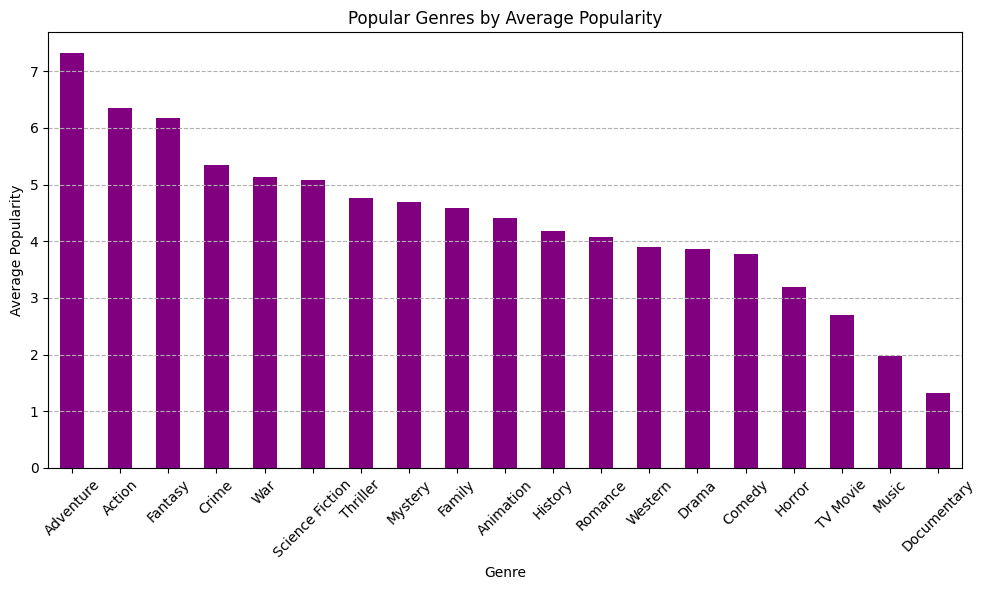

In [26]:
# Spliting the genre_names column to ensure each genre name in a movie gets its own row
tmdb_df_exploded = tmdb_df.explode('genre_names')
# Grouping by 'genre_names' and calculating the mean popularity for each genre
popular_genres = tmdb_df_exploded.groupby('genre_names')['popularity'].mean().sort_values(ascending=False)
# Plotting a bar graph for the top 10 most popular Genre
plt.figure(figsize=(10, 6))
popular_genres.plot.bar(color='purple')
plt.title('Popular Genres by Average Popularity')
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

 Adventure movies receive high popularity from the audience

<ipython-input-27-1174d4439e95>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=most_voted_genres, x='genre_names', y='vote_count', palette='magma', order=most_voted_genres['genre_names'])


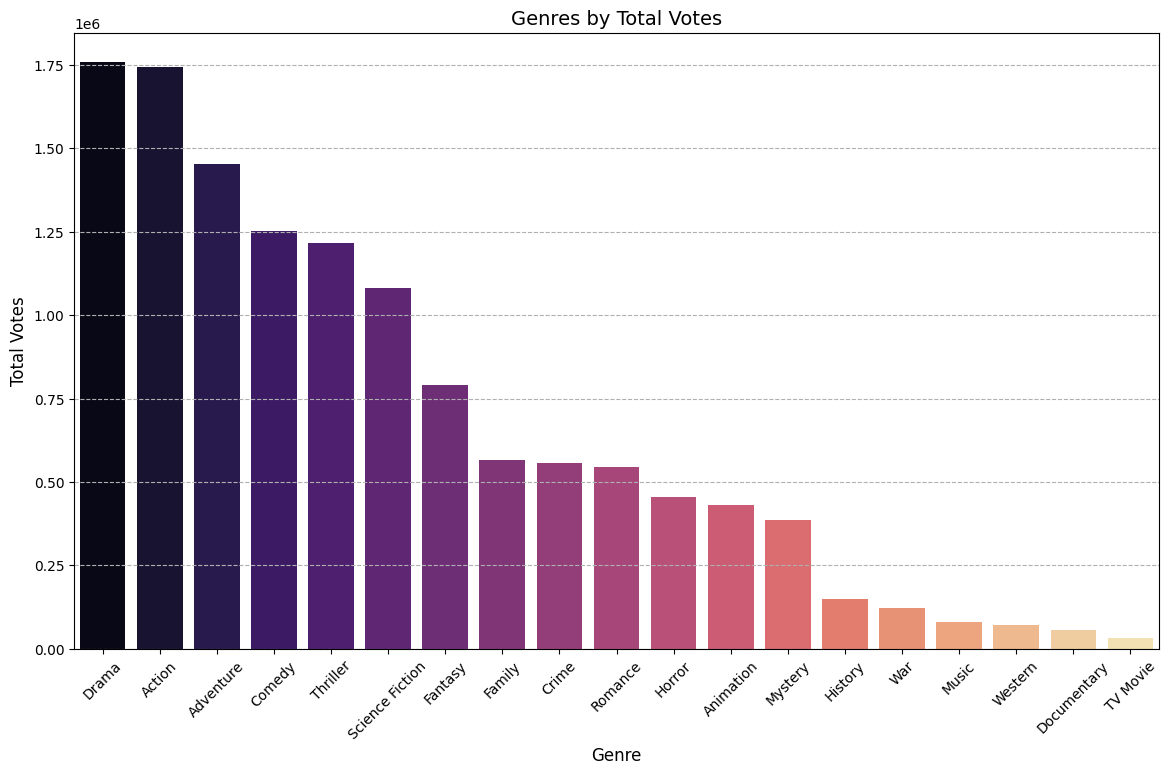

In [27]:
genre_analysis = tmdb_df_exploded.groupby('genre_names', as_index=False).agg({'vote_count': 'sum'})

# Sorting genres by total votes
most_voted_genres = genre_analysis.sort_values(by='vote_count', ascending=False)

# Plotting all genres
plt.figure(figsize=(14, 8))
sns.barplot(data=most_voted_genres, x='genre_names', y='vote_count', palette='magma', order=most_voted_genres['genre_names'])

plt.title('Genres by Total Votes', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Total Votes', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')


plt.show()


drama movies recieve high total votes from audience based on total votes

<ipython-input-28-bc968f6c234e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=most_voted_genres_avg, x='genre_names', y='vote_average', palette='magma', order=most_voted_genres_avg['genre_names'])


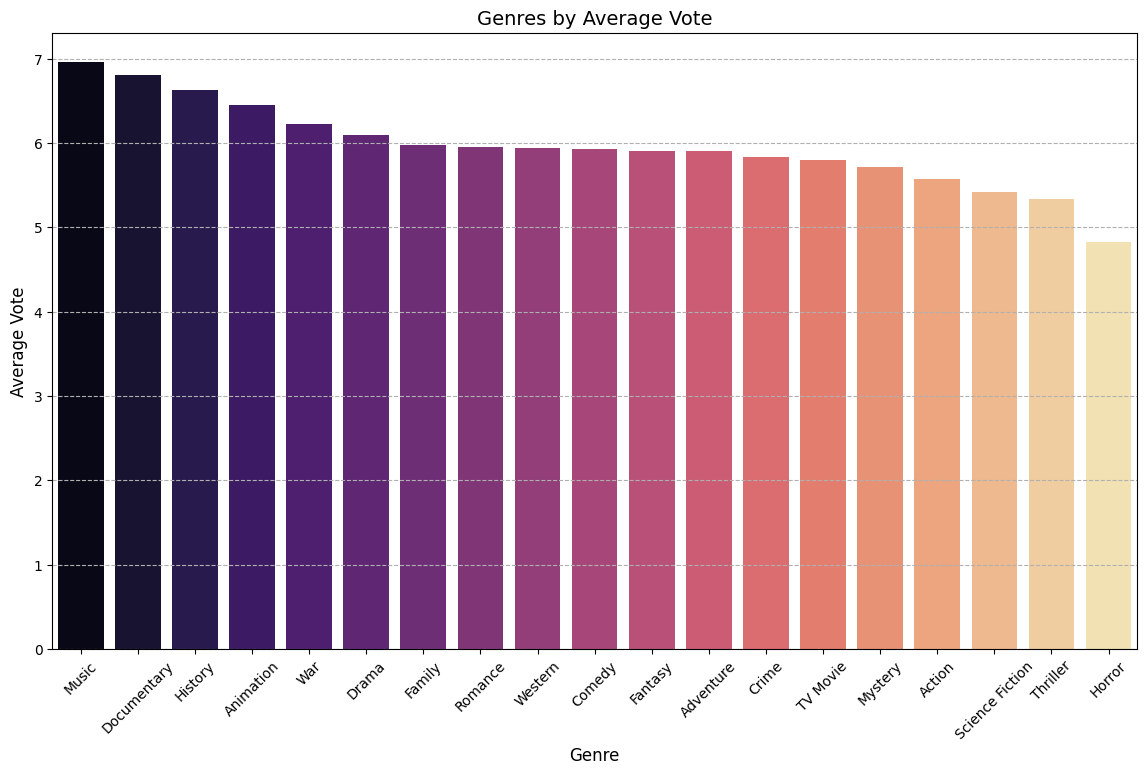

In [28]:
genre_analysis_avg = tmdb_df_exploded.groupby('genre_names', as_index=False).agg({'vote_average': 'mean'})
# Sorting genres by average vote in descending order
most_voted_genres_avg = genre_analysis_avg.sort_values(by='vote_average', ascending=False)
# Plotting average vote for each genre
plt.figure(figsize=(14, 8))
sns.barplot(data=most_voted_genres_avg, x='genre_names', y='vote_average', palette='magma', order=most_voted_genres_avg['genre_names'])
plt.title('Genres by Average Vote', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Average Vote', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')

plt.show()


based on average votes music movies are highly rated

#   LANGUAGE ANALYSIS

In [29]:
#checking the 20 most used languages in movies
language_counts = tmdb_df['original_language'].value_counts().head(20)
print(language_counts)

original_language
en    20043
fr      472
es      410
ru      290
ja      239
de      223
hi      168
zh      167
it      107
ko       91
pt       87
sv       65
da       51
pl       49
cn       47
no       46
nl       44
th       37
he       35
ar       30
Name: count, dtype: int64


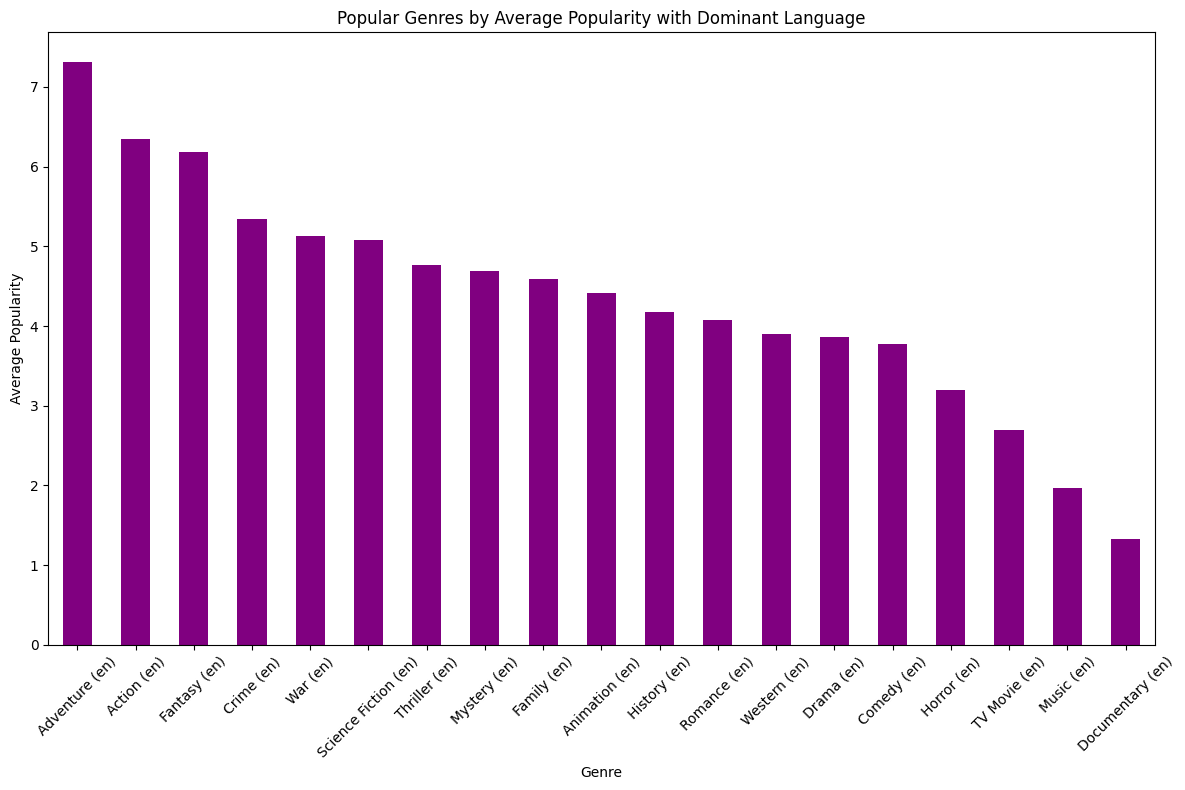

In [30]:
# Splitting genre_names and calculating the average popularity and dominant language for each genre
tmdb_df_exploded = tmdb_df.explode('genre_names')
genre_insights = tmdb_df_exploded.groupby('genre_names').agg(
    average_popularity=('popularity', 'mean'),
    dominant_language=('original_language', lambda x: x.mode()[0])
).sort_values(by='average_popularity', ascending=False)

# Plotting the data
plt.figure(figsize=(12, 8))
genre_insights['average_popularity'].plot.bar(color='purple')
plt.title('Popular Genres by Average Popularity with Dominant Language')
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.xticks(range(len(genre_insights)), [f"{genre} ({lang})" for genre, lang in zip(genre_insights.index, genre_insights['dominant_language'])], rotation=45)
plt.tight_layout()
plt.show()

Based on the dominant language, English,adventure movies have a higher popularity compared to other genres

# Correlation between vote_average with popularity

Correlation between Vote Average and Popularity: 0.06712976477550323


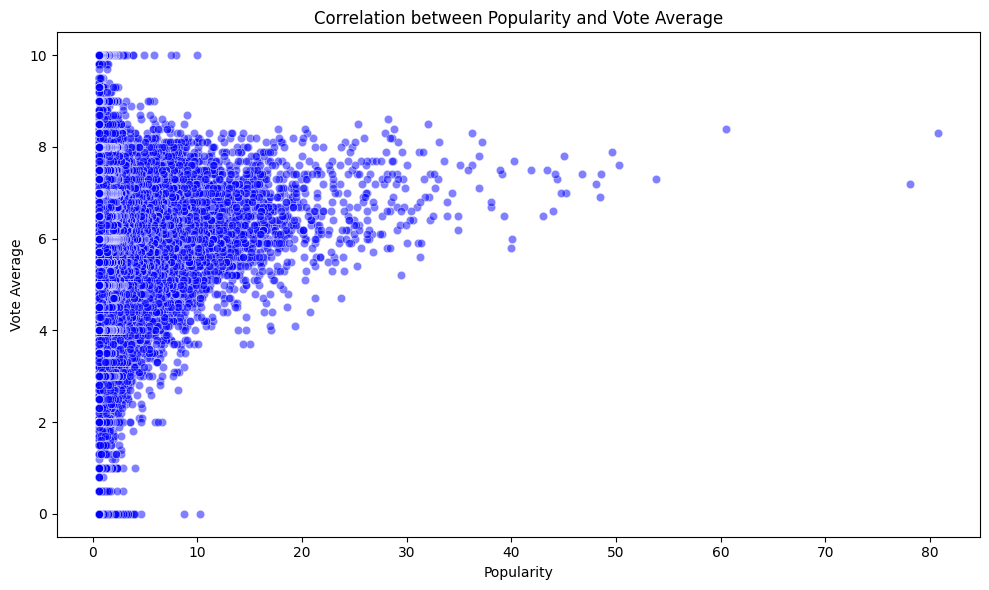

In [37]:
# Calculating correlation between vote_average and popularity
correlation = tmdb_df['vote_average'].corr(tmdb_df['popularity'])
print(f'Correlation between Vote Average and Popularity: {correlation}')

# Plotting a scatter plot for the correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='popularity',y='vote_average',data=tmdb_df,color='blue',alpha=0.5)
plt.title('Correlation between Popularity and Vote Average')
plt.xlabel('Popularity')
plt.ylabel('Vote Average')
plt.tight_layout()
plt.show()


The correlation  indicates that there is a weak positive correlation between Popularity and Vote Average as it is close to 0.this  shows that there is a very little linear relationship between movie popularity and its average vote.
Movies that are more popular do not necessarily have higher or lower average ratings. The two variables seem largely independent of each other.

# CORRELATION

              vote_average  vote_count  popularity
vote_average      1.000000    0.087897    0.067130
vote_count        0.087897    1.000000    0.686472
popularity        0.067130    0.686472    1.000000


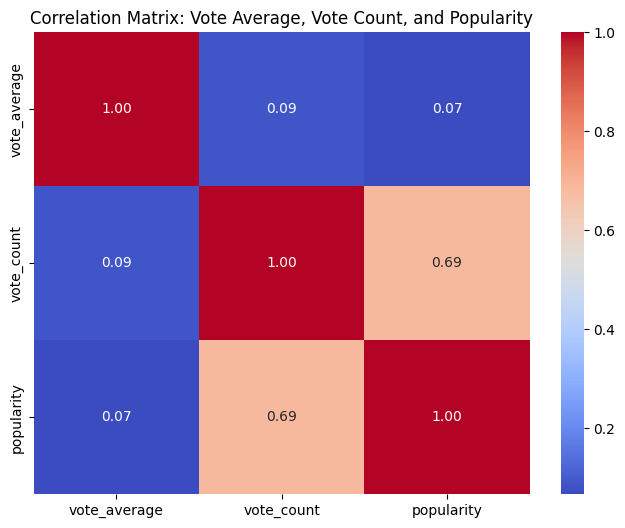

In [41]:

# Calculating correlation
correlation_matrix = tmdb_df[['vote_average', 'vote_count', 'popularity']].corr()
print(correlation_matrix)

# Visualizing the correlation using heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix: Vote Average, Vote Count, and Popularity')
plt.show()

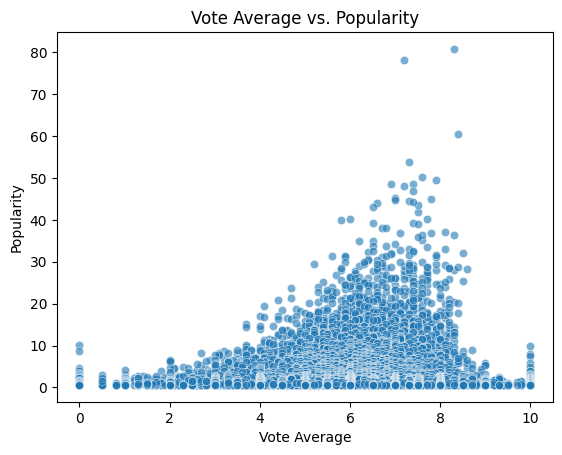

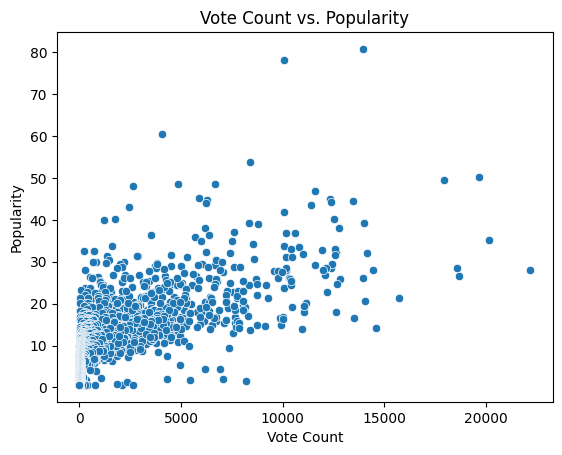

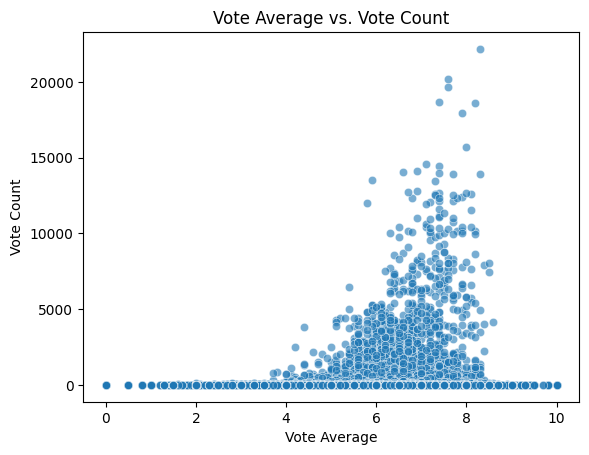

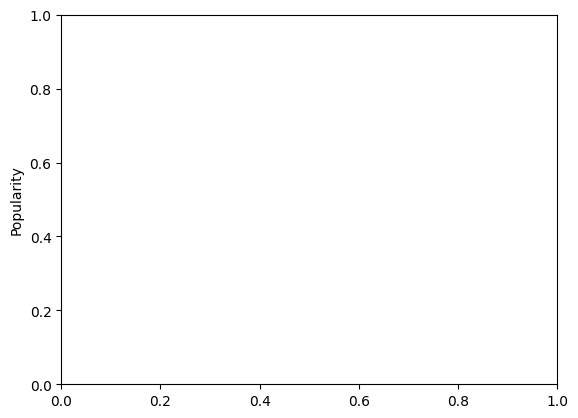

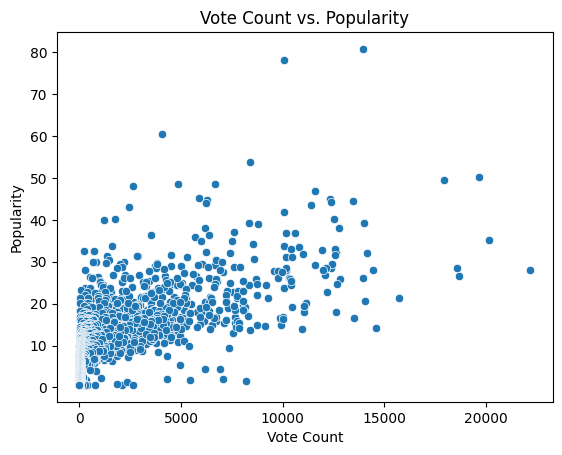

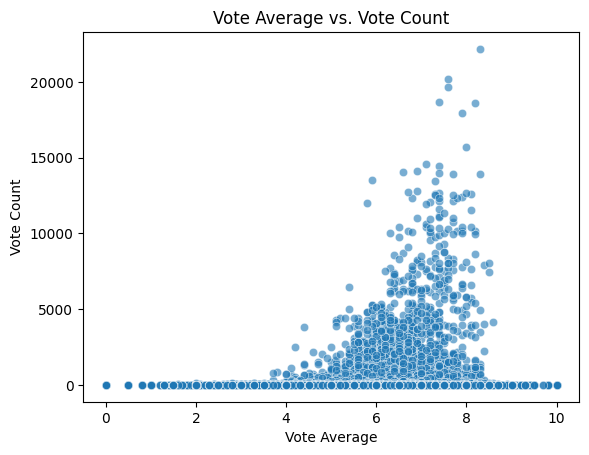

In [40]:
# Scatter plot for Vote Average vs. Popularity
sns.scatterplot(data=tmdb_df, x='vote_average', y='popularity', alpha=0.6)
plt.title('Vote Average vs. Popularity')
plt.xlabel('Vote Average')
plt.ylabel('Popularity')
plt.show()

# Scatter plot for Vote Count vs. Popularity
sns.scatterplot(data=tmdb_df, x='vote_count', y='popularity')
plt.title('Vote Count vs. Popularity')
plt.xlabel('Vote Count')
plt.ylabel('Popularity')
plt.show()

# Scatter plot for Vote Average vs. Vote Count
sns.scatterplot(data=tmdb_df, x='vote_average', y='vote_count', alpha=0.6)
plt.title('Vote Average vs. Vote Count')
plt.xlabel('Vote Average')
plt.ylabel('Vote Count')
plt.show()
plt.ylabel('Popularity')
plt.show()

# Scatter plot for Vote Count vs. Popularity
sns.scatterplot(data=tmdb_df, x='vote_count', y='popularity')
plt.title('Vote Count vs. Popularity')
plt.xlabel('Vote Count')
plt.ylabel('Popularity')
plt.show()

# Scatter plot for Vote Average vs. Vote Count
sns.scatterplot(data=tmdb_df, x='vote_average', y='vote_count', alpha=0.6)
plt.title('Vote Average vs. Vote Count')
plt.xlabel('Vote Average')
plt.ylabel('Vote Count')
plt.show()

# Investigating how older movies compare to recent ones in popularity.

<ipython-input-34-5b79a9b72baa>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  popularity_by_age = df.groupby('age_group')['popularity'].mean().reset_index()


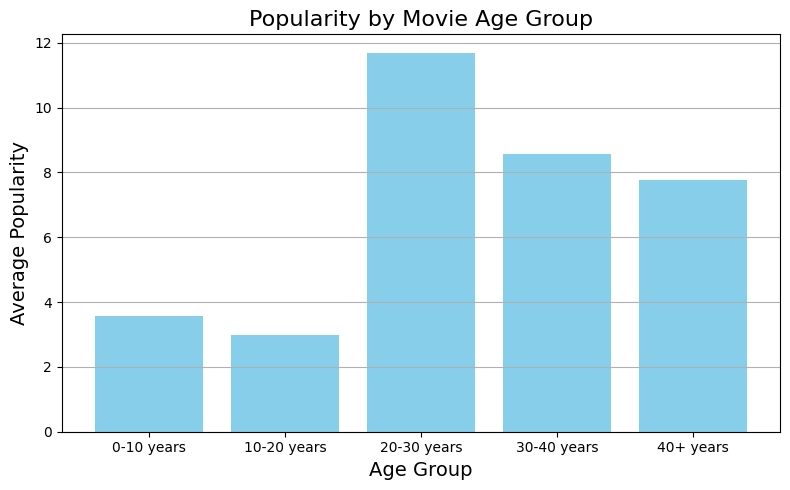

In [34]:
# Converting release_date to datetime and extract year
tmdb_df['release_date'] = pd.to_datetime(tmdb_df['release_date'])
tmdb_df['release_year'] = tmdb_df['release_date'].dt.year
# Calculating movie age
current_year = datetime.now().year
tmdb_df['movie_age'] = current_year - tmdb_df['release_year']
# Aggregating popularity by age group
tmdb_df['age_group'] = pd.cut(tmdb_df['movie_age'], bins=[0, 10, 20, 30, 40, 100], labels=["0-10 years", "10-20 years", "20-30 years", "30-40 years", "40+ years"])
popularity_by_age = tmdb_df.groupby('age_group')['popularity'].mean().reset_index()
# Plotting longevity
plt.figure(figsize=(8, 5))
plt.bar(popularity_by_age['age_group'], popularity_by_age['popularity'], color='skyblue')
plt.title('Popularity by Movie Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Average Popularity', fontsize=14)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [42]:
from sklearn.preprocessing import LabelEncoder

# Encode 'original_language' as numeric values
label_encoder = LabelEncoder()
tmdb_df['original_language_encoded'] = label_encoder.fit_transform(tmdb_df['original_language'])

# Include the encoded column in the correlation calculation
correlation_matrix = tmdb_df[['vote_average', 'vote_count', 'popularity', 'original_language_encoded']].corr()
print(correlation_matrix)


                           vote_average  vote_count  popularity  \
vote_average                   1.000000    0.087897    0.067130   
vote_count                     0.087897    1.000000    0.686472   
popularity                     0.067130    0.686472    1.000000   
original_language_encoded      0.029365   -0.036236    0.003266   

                           original_language_encoded  
vote_average                                0.029365  
vote_count                                 -0.036236  
popularity                                  0.003266  
original_language_encoded                   1.000000  


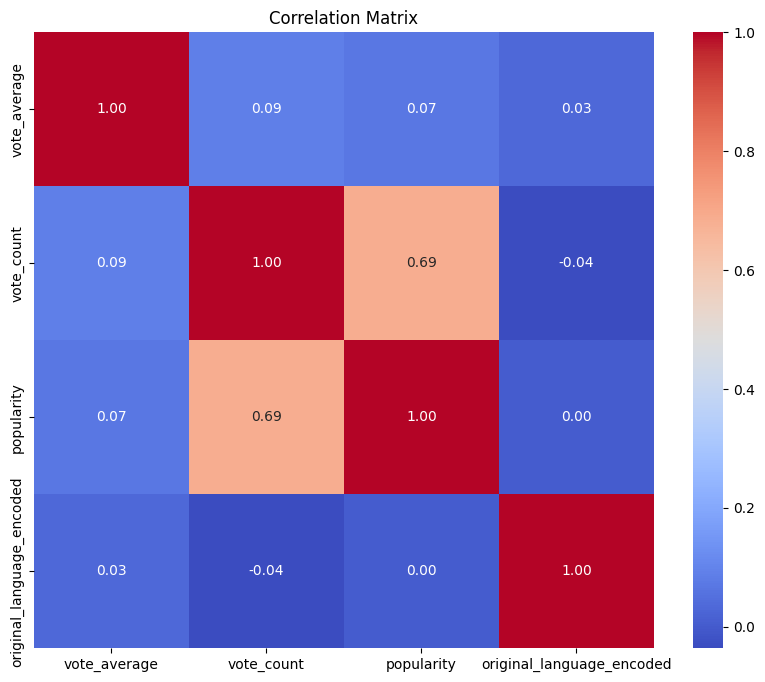

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [45]:
import requests

# Your API key
api_key = "0135236f1aaceb14241d05ec5221485b"

# Function to get movie revenue
def get_movie_revenue(movie_title):
    search_url = f"https://api.themoviedb.org/3/search/movie"
    params = {
        "api_key": api_key,
        "query": movie_title,
        "language": "en-US"
    }

    # Send GET request to the TMDb API
    response = requests.get(search_url, params=params)

    # If the response is successful
    if response.status_code == 200:
        results = response.json().get('results', [])
        if results:
            movie_id = results[0]['id']  # Use the first result

            # Fetch detailed movie data including revenue
            movie_url = f"https://api.themoviedb.org/3/movie/{movie_id}"
            movie_response = requests.get(movie_url, params={"api_key": api_key})

            if movie_response.status_code == 200:
                movie_data = movie_response.json()
                return movie_data.get('revenue', None), movie_data.get('budget', None)
            else:
                return None, None
        else:
            return None, None
    else:
        return None, None

# Example: Fetch revenue for the first movie in the DataFrame
title = tmdb_df.loc[0, 'title']  # Assuming 'title' column contains movie titles
local_revenue, budget = get_movie_revenue()

print(f"Movie: {title}")
print(f"Local Revenue: ${local_revenue}")
print(f"Budget: ${budget}")


Movie: Harry Potter and the Deathly Hallows: Part 1
Local Revenue: $954305868
Budget: $250000000


In [46]:
# Function to update the DataFrame with revenue and budget data
def update_revenue_data(tmdb_df):
    revenues = []
    budgets = []

    for title in tmdb_df['title']:  # Assuming 'title' column contains movie titles
        local_revenue, budget = get_movie_revenue(title)
        revenues.append(local_revenue)
        budgets.append(budget)

    # Add the revenue and budget columns to the DataFrame
    tmdb_df['local_revenue'] = revenues
    tmdb_df['budget'] = budgets

    return tmdb_df

# Update the DataFrame with revenue data
tmdb_df_updated = update_revenue_data(tmdb_df)

# View the updated DataFrame with the new columns
print(tmdb_df_updated.head())


             genre_ids     id original_language  popularity release_date  \
0      [12, 14, 10751]  12444                en      33.533   2010-11-19   
1  [14, 12, 16, 10751]  10191                en      28.734   2010-03-26   
2        [12, 28, 878]  10138                en      28.515   2010-05-07   
3      [16, 35, 10751]    862                en      28.005   1995-11-22   
4        [28, 878, 12]  27205                en      27.920   2010-07-16   

                                          title  vote_average  vote_count  \
0  Harry Potter and the Deathly Hallows: Part 1           7.7       10788   
1                      How to Train Your Dragon           7.7        7610   
2                                    Iron Man 2           6.8       12368   
3                                     Toy Story           7.9       10174   
4                                     Inception           8.3       22186   

                               genre_names  release_year  movie_age  \
0        

In [49]:
language_counts = tmdb_df['original_language_encoded'].value_counts().head(20)
print(language_counts)

original_language_encoded
16    20043
22      472
17      410
55      290
34      239
13      223
26      168
74      167
33      107
38       91
53       87
61       65
12       51
52       49
8        47
50       46
49       44
65       37
25       35
2        30
Name: count, dtype: int64
